In [21]:
! pip install -q yfinance


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMAZON
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON


Using globals() is a sloppy way of setting the DataFrame names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.
Look for an alternative.

In [23]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,166.815539,168.476136,165.440399,167.050239,166.543711,6.207282e+07
std,18.541109,18.369632,18.703843,18.525634,18.677370,1.863101e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,3.145820e+07
25%,151.070000,153.324997,150.165001,151.665001,150.937073,4.955515e+07
50%,172.020004,173.630005,170.929993,172.399994,172.110535,5.746290e+07
75%,180.070007,181.380005,177.994995,179.945000,179.586967,6.912690e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [24]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-23 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


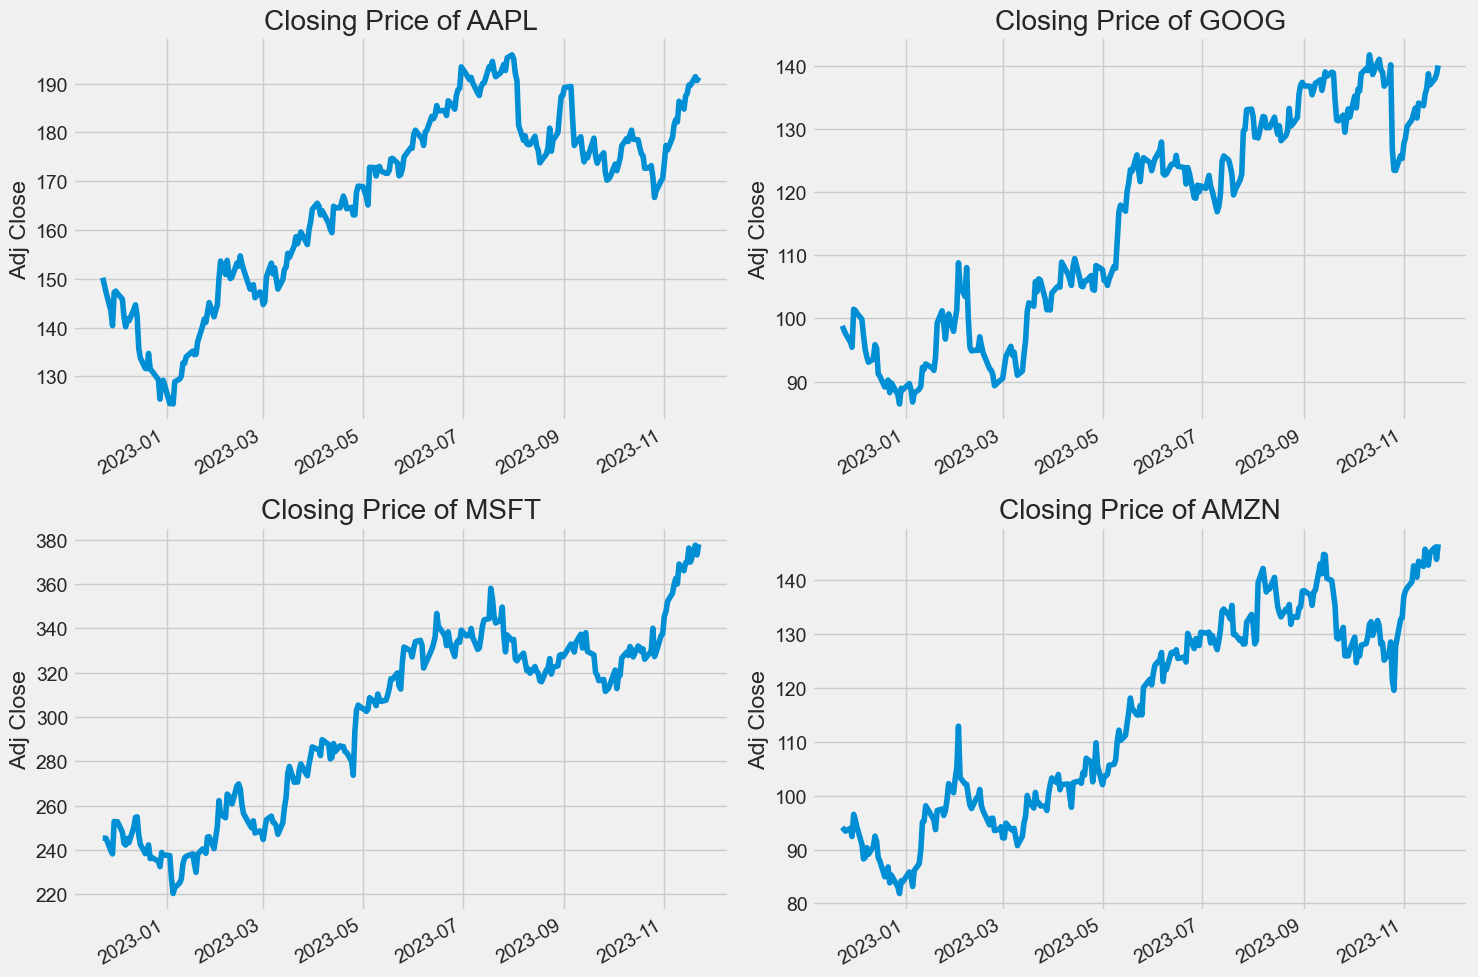

In [25]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

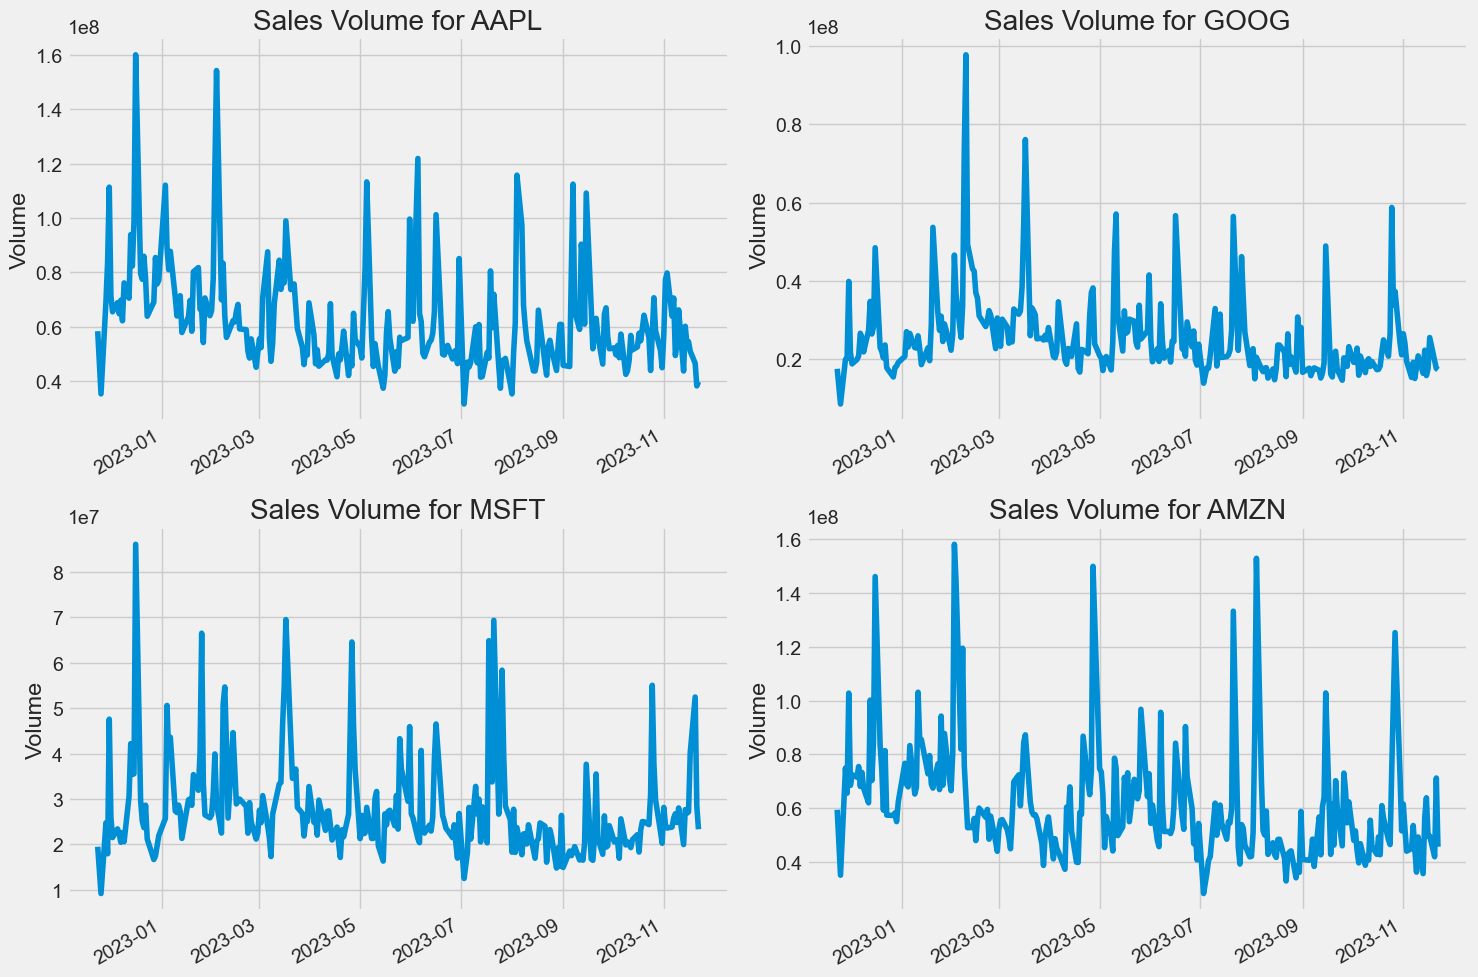

In [26]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

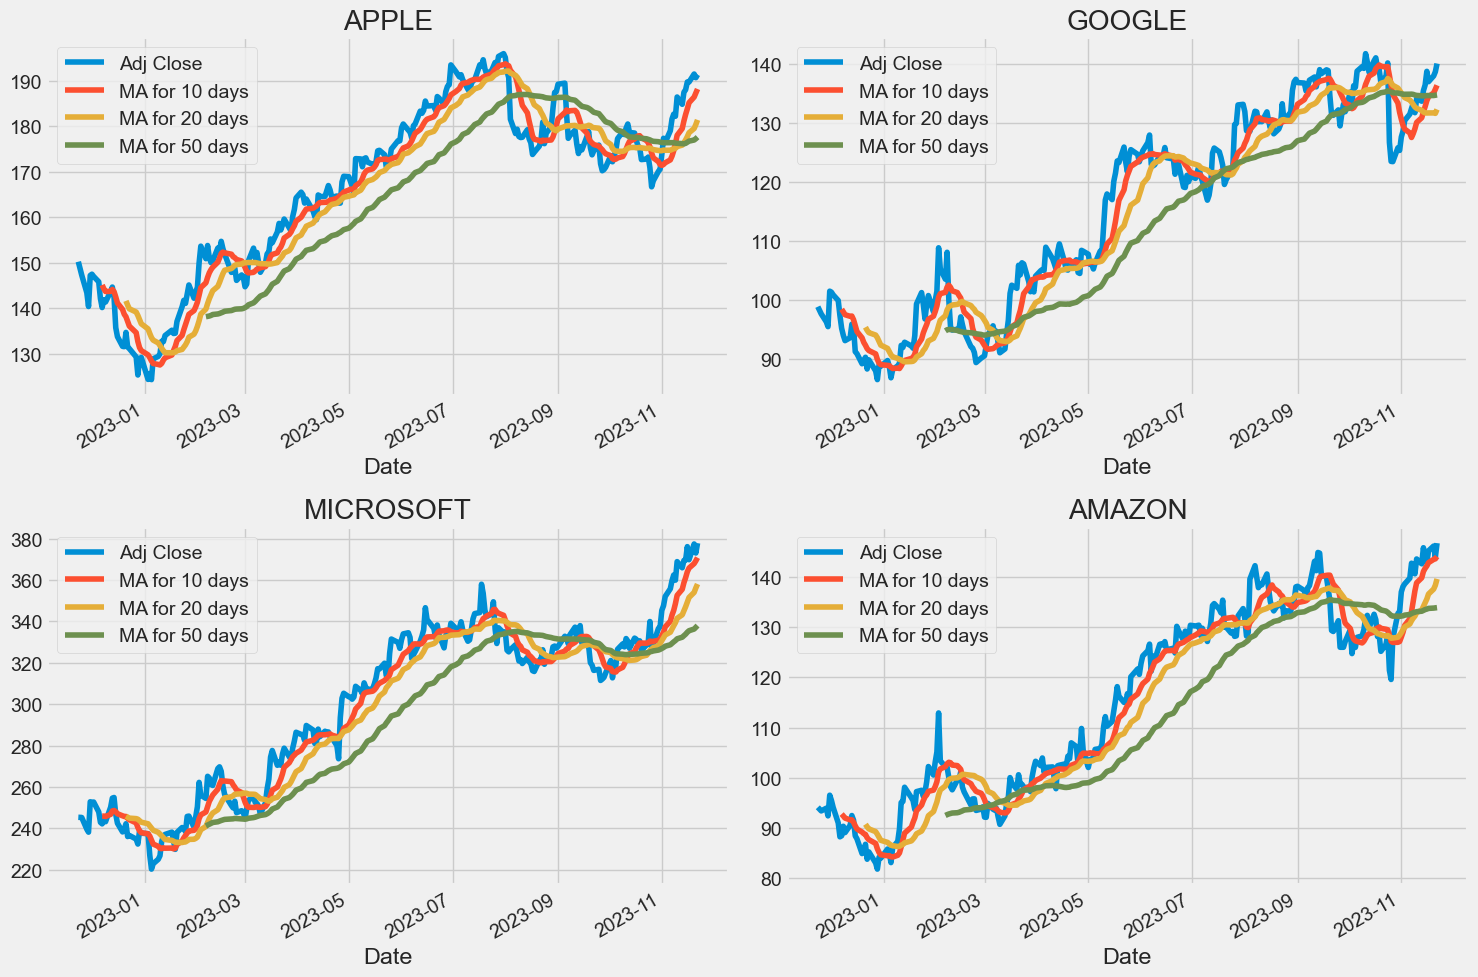

In [27]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

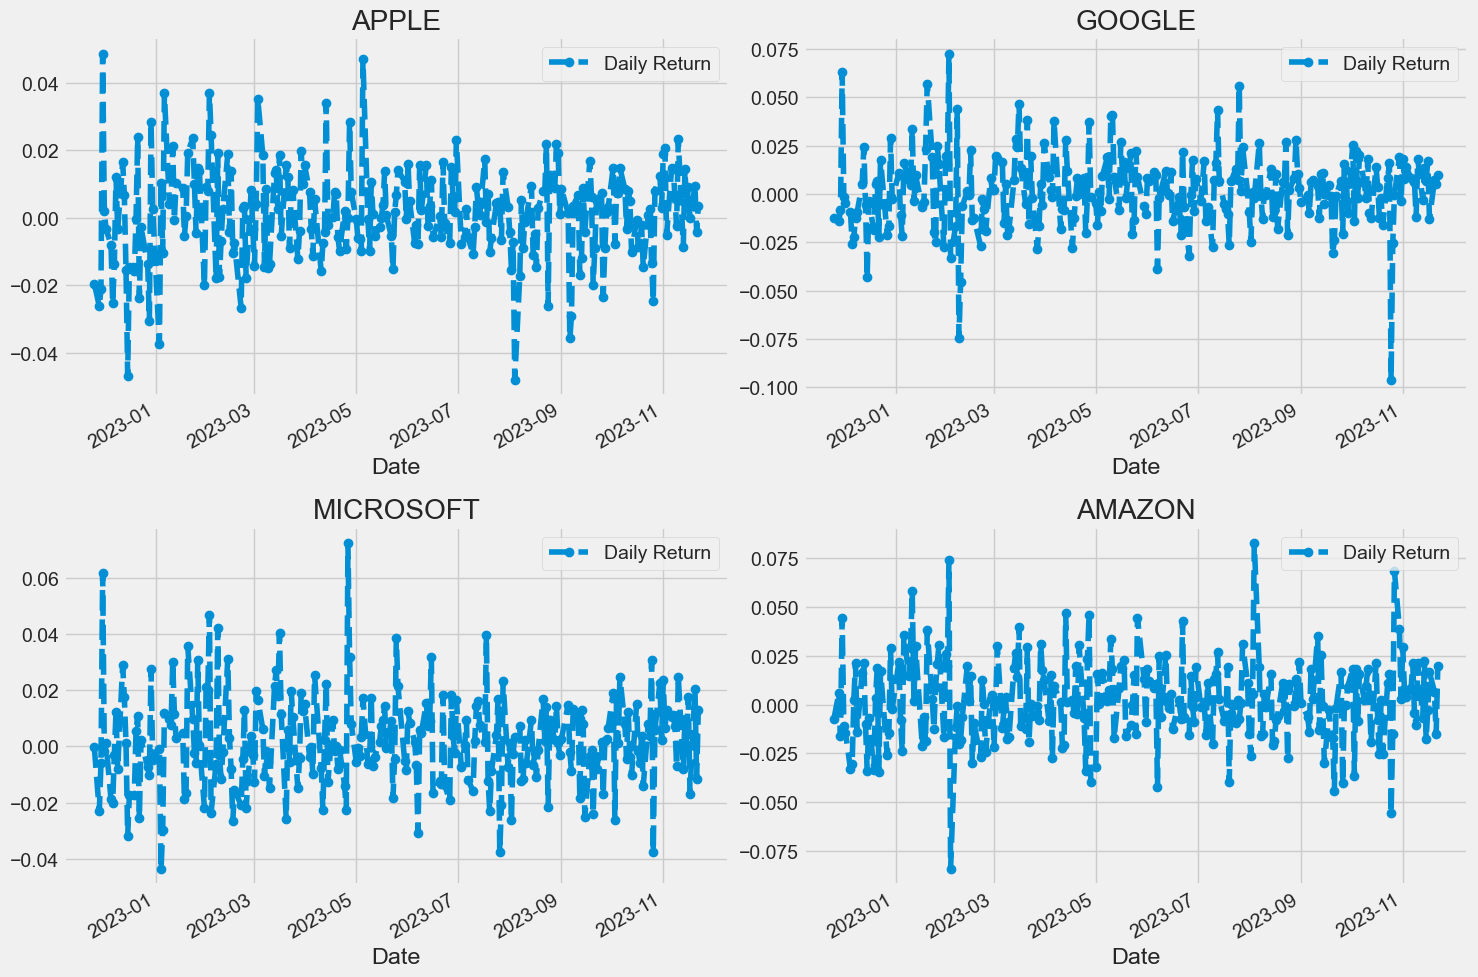

In [28]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

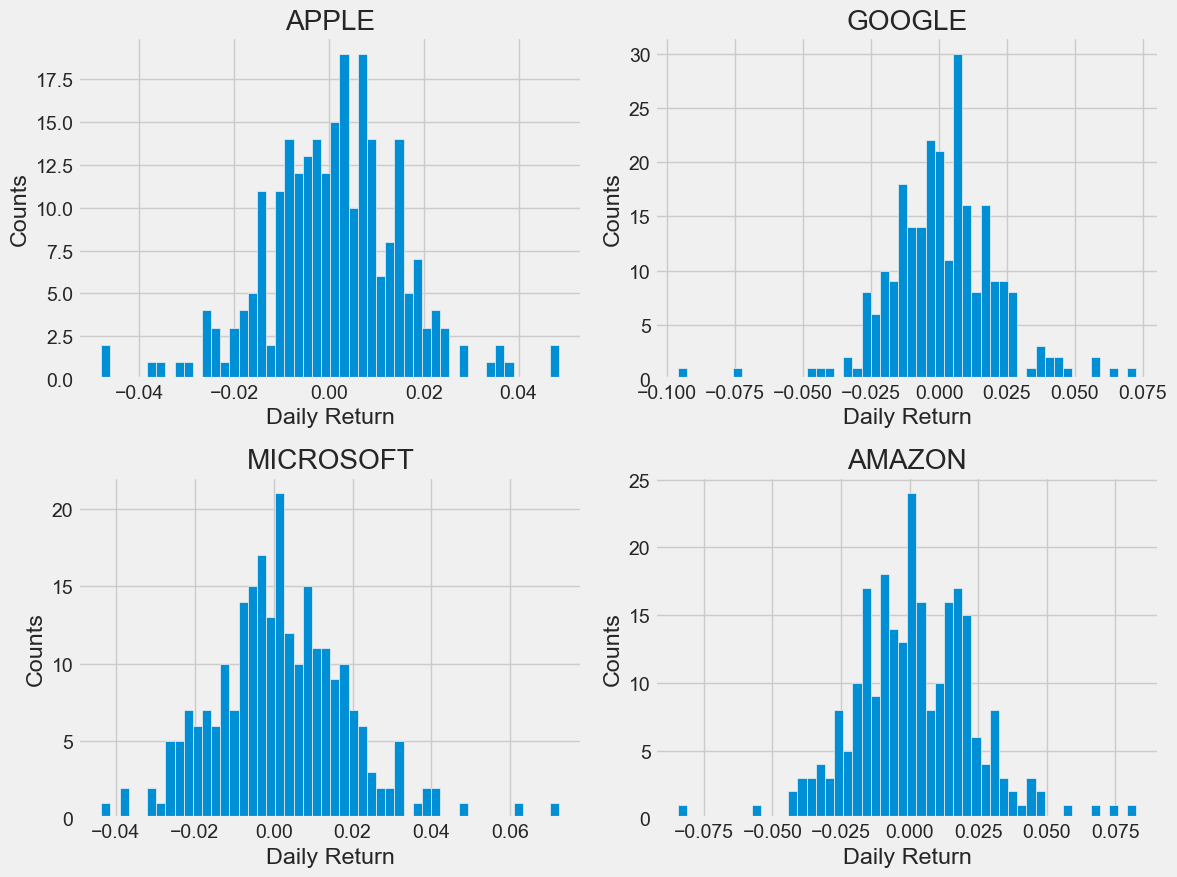

In [29]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [30]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-23,NaN,NaN,NaN,NaN
2022-11-25,-0.019594,-0.007649,-0.012346,-0.000363
2022-11-28,-0.026264,0.005781,-0.013832,-0.023153
2022-11-29,-0.021148,-0.016285,-0.008416,-0.005915
2022-11-30,0.048594,0.044579,0.062971,0.061624


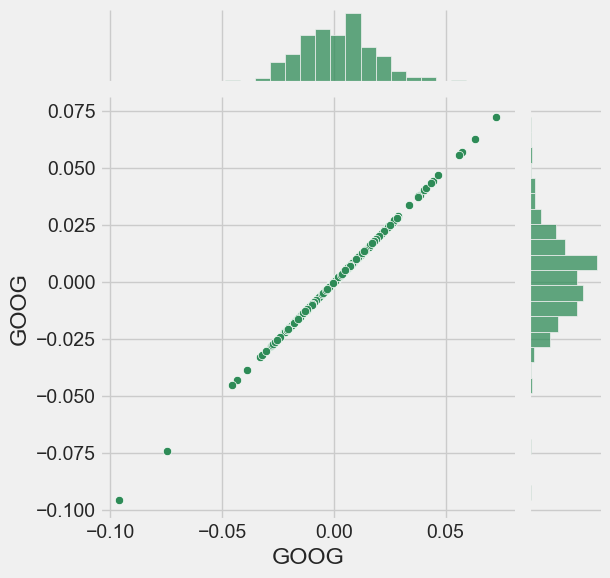

In [31]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

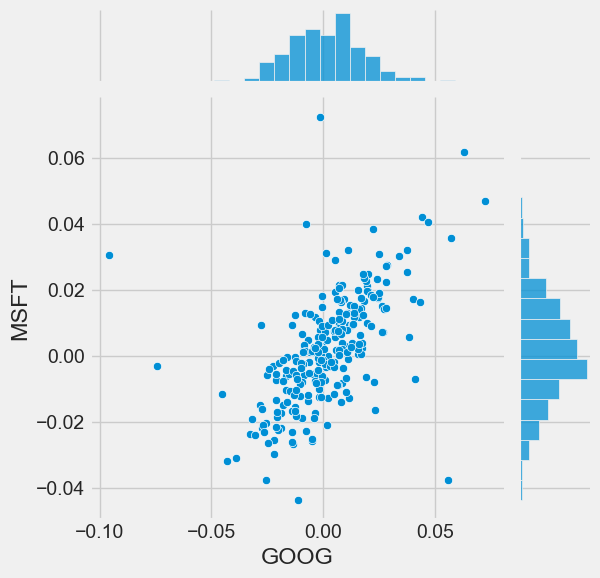

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

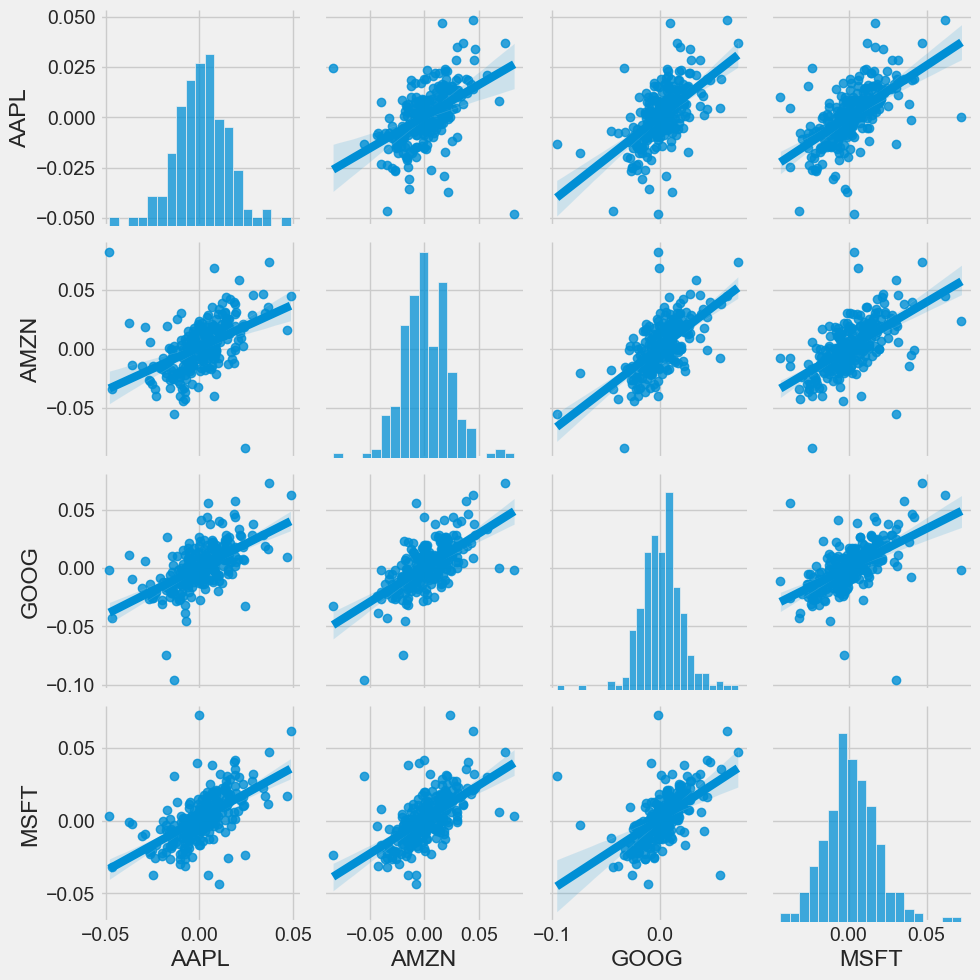

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

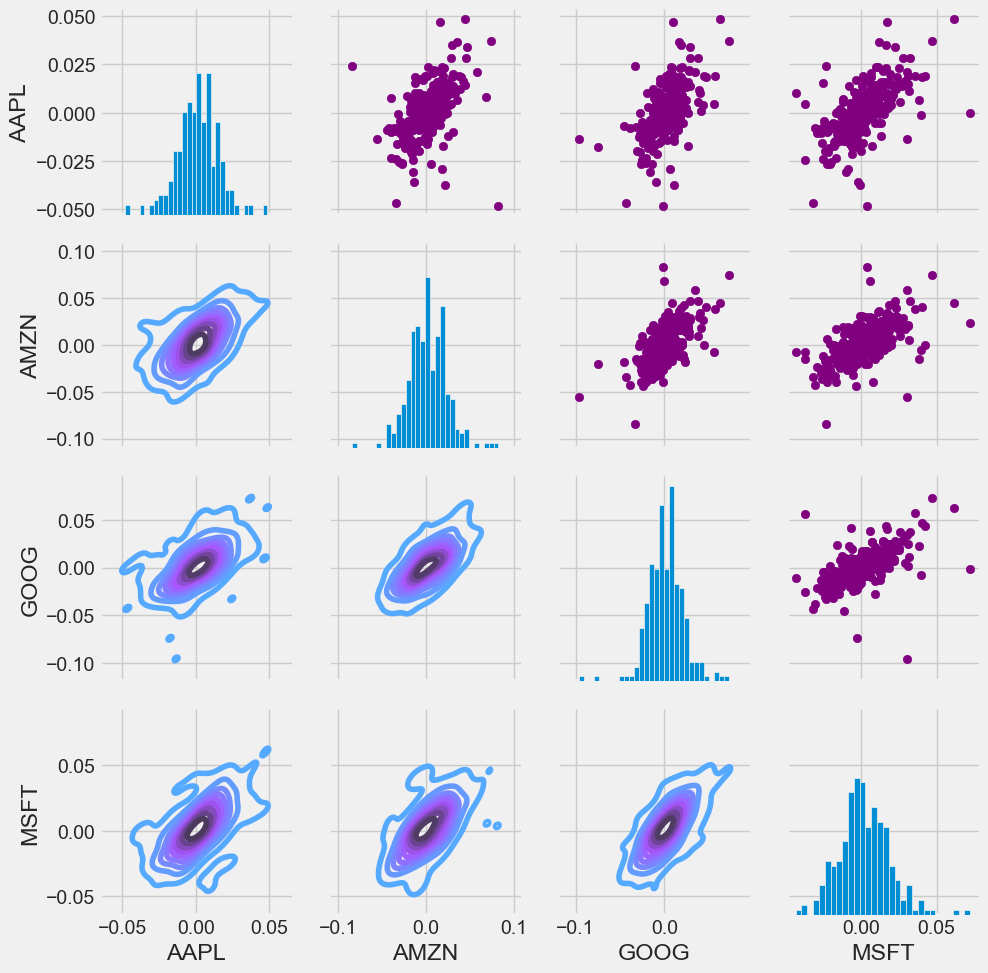

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

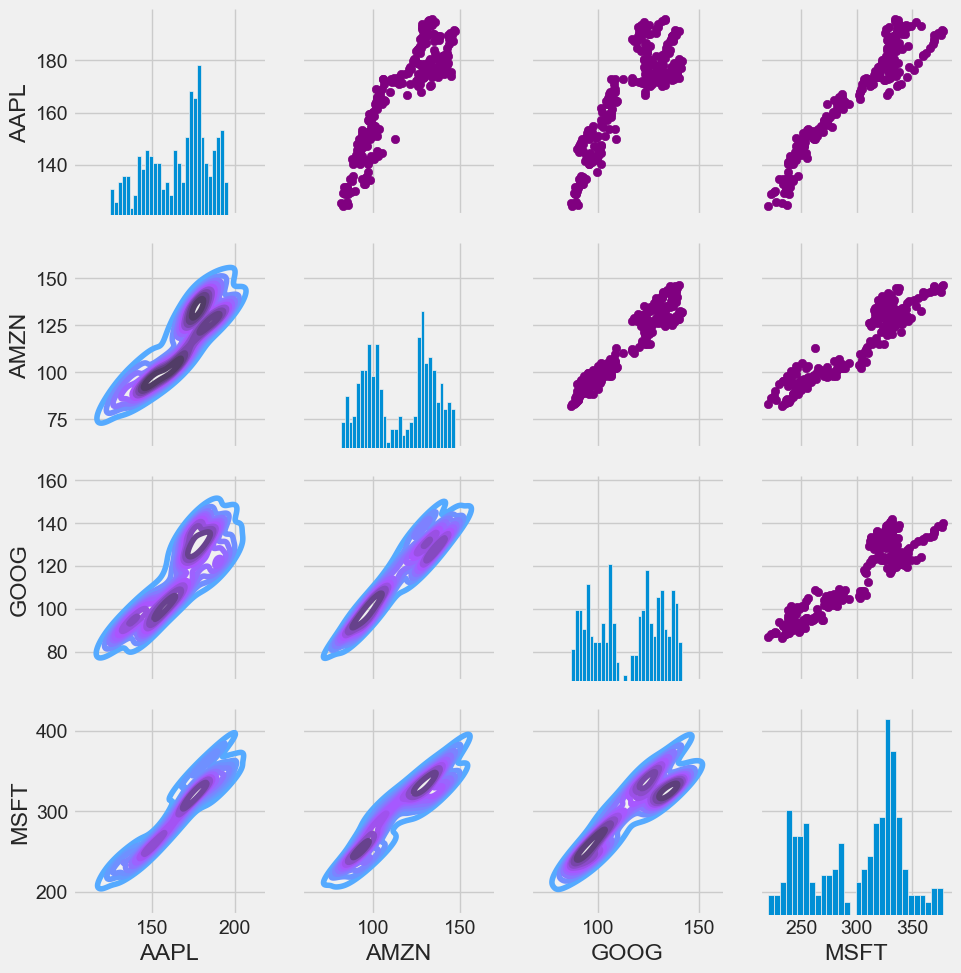

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

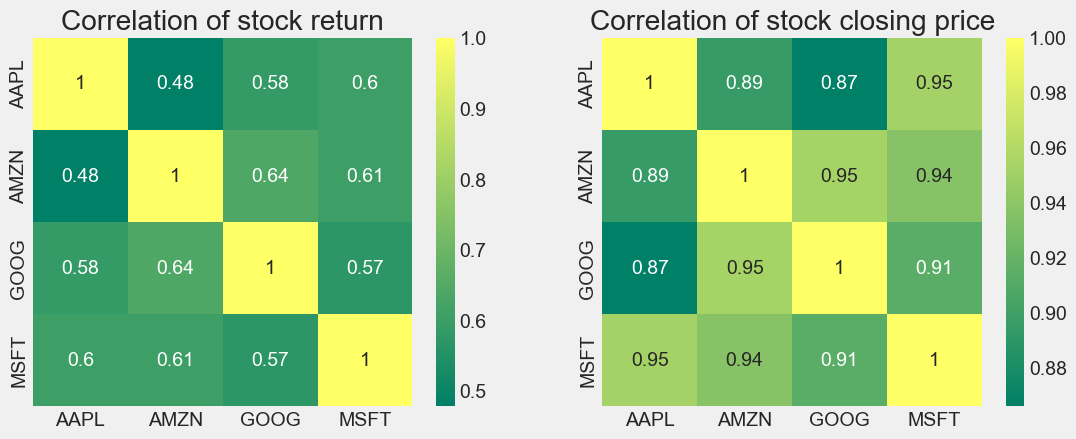

In [36]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

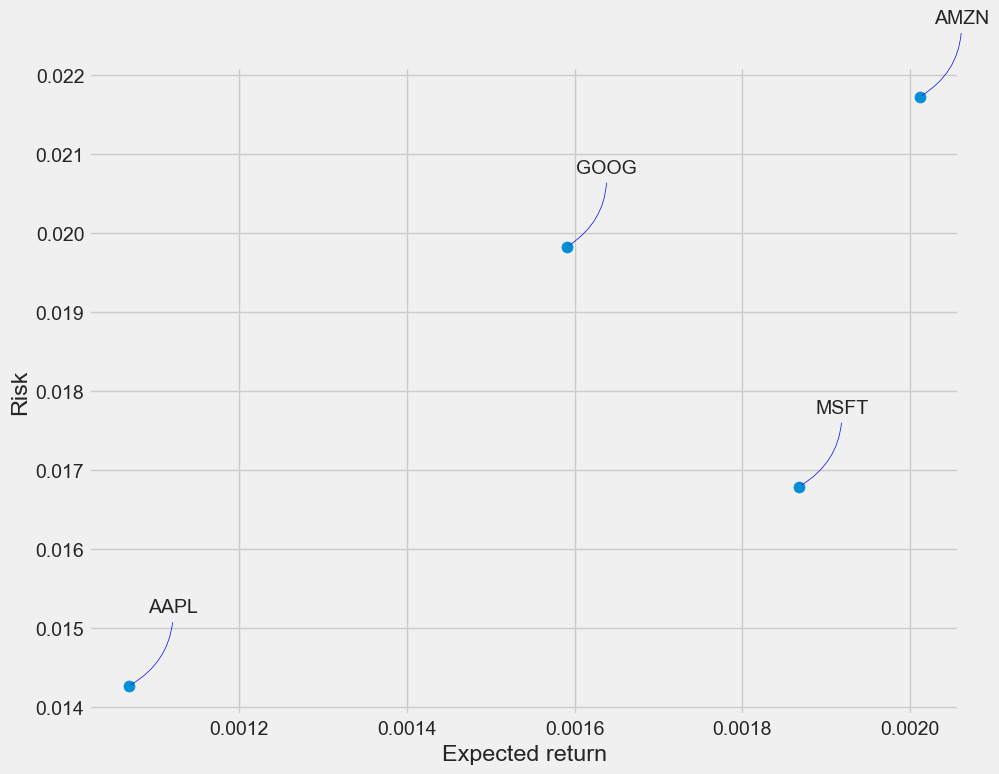

In [37]:
# This is for the risk quantification part
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [38]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2020-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200
...,...,...,...,...,...,...
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100


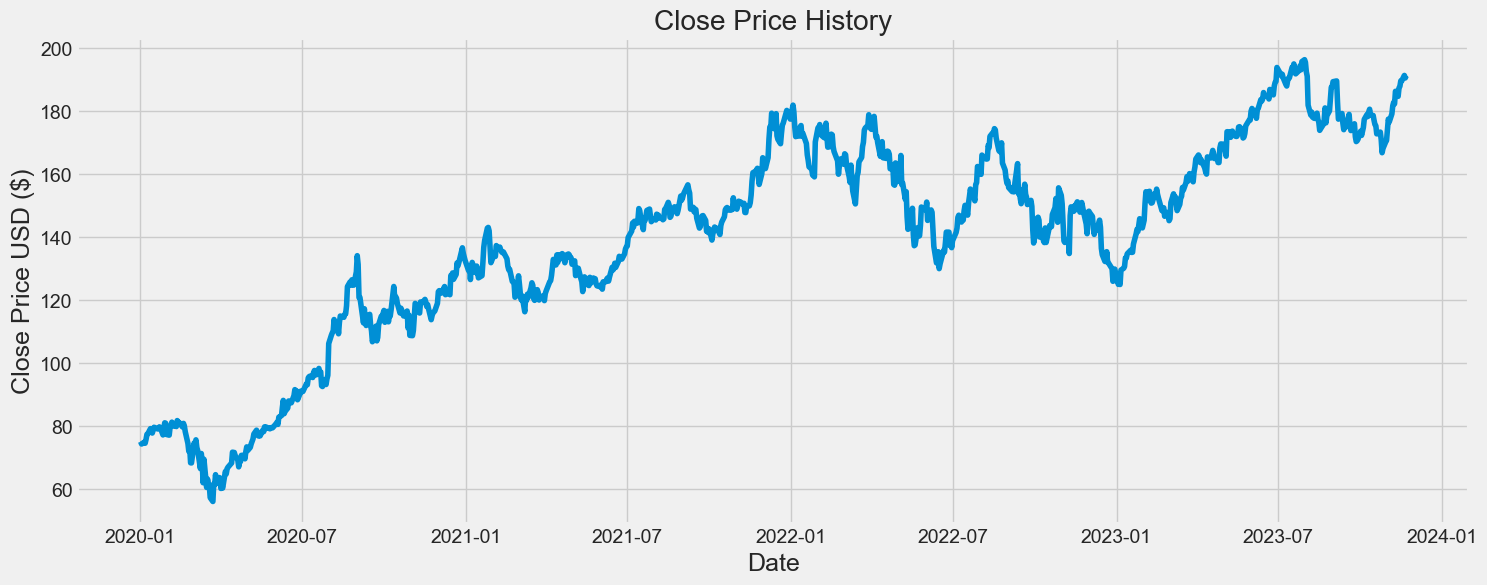

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

932

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.13533301],
       [0.13013198],
       [0.13435334],
       [0.13184194],
       [0.14039152],
       [0.15186223],
       [0.15310901],
       [0.16491815],
       [0.15729476],
       [0.15490801],
       [0.16185454],
       [0.16807085],
       [0.16422352],
       [0.16623625],
       [0.16896143],
       [0.16732274],
       [0.15065105],
       [0.16621842],
       [0.17806316],
       [0.17722601],
       [0.1516485 ],
       [0.1501345 ],
       [0.16828458],
       [0.17291562],
       [0.17961277],
       [0.17038634],
       [0.1730937 ],
       [0.16963823],
       [0.18315733],
       [0.17900718],
       [0.1791497 ],
       [0.16855174],
       [0.17678072],
       [0.17086724],
       [0.15795379],
       [0.13146786],
       [0.11347807],
       [0.12161801],
       [0.0875443 ],
       [0.0872593 ],
       [0.13259   ],
       [0.11568675],
       [0.13958997],
       [0.12209896],
       [0.1151702 ],
       [0.07445277],
       [0.10859769],
       [0.090

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.13533301, 0.13013198, 0.13435334, 0.13184194, 0.14039152,
       0.15186223, 0.15310901, 0.16491815, 0.15729476, 0.15490801,
       0.16185454, 0.16807085, 0.16422352, 0.16623625, 0.16896143,
       0.16732274, 0.15065105, 0.16621842, 0.17806316, 0.17722601,
       0.1516485 , 0.1501345 , 0.16828458, 0.17291562, 0.17961277,
       0.17038634, 0.1730937 , 0.16963823, 0.18315733, 0.17900718,
       0.1791497 , 0.16855174, 0.17678072, 0.17086724, 0.15795379,
       0.13146786, 0.11347807, 0.12161801, 0.0875443 , 0.0872593 ,
       0.13259   , 0.11568675, 0.13958997, 0.12209896, 0.1151702 ,
       0.07445277, 0.10859769, 0.09094633, 0.04249862, 0.09547051,
       0.03177602, 0.05074543, 0.03972001, 0.0363536 , 0.0086743 ,
       0.        , 0.04009406, 0.03767168, 0.06068434, 0.04162587])]
[0.05421869661135997]

[array([0.13533301, 0.13013198, 0.13435334, 0.13184194, 0.14039152,
       0.15186223, 0.15310901, 0.16491815, 0.15729476, 0.15490801,
       0.16185454, 0.16807085, 0.16

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)





872/872 [==============================] - 47s 47ms/step - loss: 0.0035


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 61ms/step


6.141796960317159

C:\Users\Ogweno\AppData\Local\Temp\ipykernel_4296\3685104888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


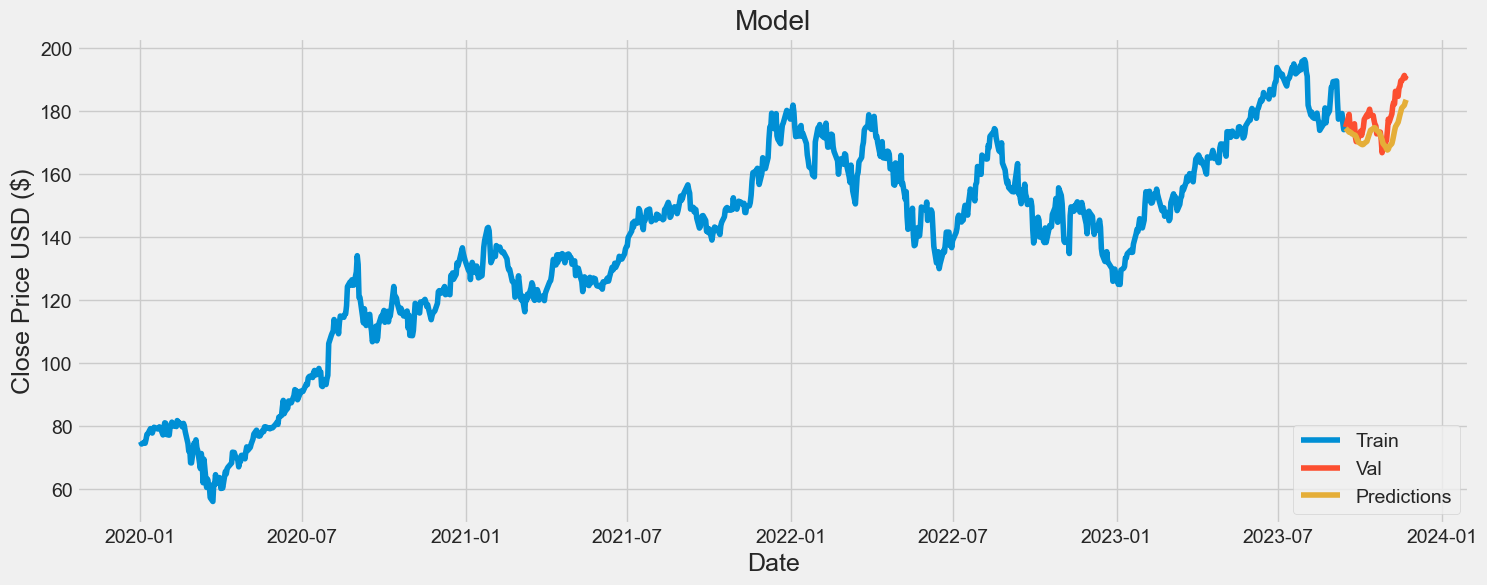

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
# Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2023-09-15,175.009995,174.660858
2023-09-18,177.970001,173.760757
2023-09-19,179.070007,173.409714
2023-09-20,175.490005,173.473221
2023-09-21,173.929993,173.311279
2023-09-22,174.789993,172.913895
2023-09-25,176.080002,172.561493
2023-09-26,171.960007,172.413254
2023-09-27,170.429993,171.893982
